# Assignment 01
#### Daniel Mehta

## Exercise 1

In [4]:
import pandas as pd

In [6]:
df = pd.read_csv('tweets.csv')

In [8]:
df.head()

,source,text,created_at,retweet_count,favorite_count,is_retweet,id_str
0,Twitter for iPhone,LOSER! https://t.co/p5imhMJqS1,05-18-2020 14:55:14,32295,135445,False,1262396333064892416
1,Twitter for iPhone,Most of the money raised by the RINO losers of...,05-05-2020 18:18:26,19706,82425,False,1257736426206031874
2,Twitter for iPhone,....because they don’t know how to win and the...,05-05-2020 04:46:34,12665,56868,False,1257532112233803782
3,Twitter for iPhone,....lost for Evan “McMuffin” McMullin (to me)....,05-05-2020 04:46:34,13855,62268,False,1257532114666508291
4,Twitter for iPhone,....get even for all of their many failures. Y...,05-05-2020 04:46:33,8122,33261,False,1257532110971318274


In [28]:
import re
import unicodedata
import nltk
from nltk.corpus import stopwords

# add appropriate words that will be ignored in the analysis
ADDITIONAL_STOPWORDS = ['covfefe']

import matplotlib.pyplot as plt

In [30]:
def basic_clean(text):
    """
    A simple function to clean up the data. All the words that
    are not designated as a stop word is then lemmatized after
    encoding and basic regex parsing are performed.
    """
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [32]:
words = basic_clean(''.join(str(df['text'].tolist())))

In [34]:
words[:20]

['loser',
 'httpstcop5imhmjqs1',
 'money',
 'raised',
 'rino',
 'loser',
 'socalled',
 'lincoln',
 'project',
 'go',
 'pocket',
 'ive',
 'done',
 'judge',
 'tax',
 'regulation',
 'healthcare',
 'military',
 'vet',
 'choice']

#### N-Grams

In [39]:
# bi grams
(pd.Series(nltk.ngrams(words, 2)).value_counts())[:10]

(hater, loser)        42
(total, loser)        32
(loser, hater)        14
(amp, loser)          13
(donald, trump)       11
(hater, amp)          11
(separate, winner)     8
(winner, loser)        8
(twist, fate)          6
(loser, happy)         6
Name: count, dtype: int64

In [41]:
# tri grams
(pd.Series(nltk.ngrams(words, 3)).value_counts())[:10]

(hater, amp, loser)             10
(separate, winner, loser)        8
(hater, loser, happy)            6
(winner, loser, person)          6
(loser, person, reacts)          6
(person, reacts, new)            6
(reacts, new, twist)             6
(new, twist, fate)               6
(everyone, including, hater)     5
(including, hater, loser)        5
Name: count, dtype: int64

In [43]:
bigrams_series = (pd.Series(nltk.ngrams(words, 2)).value_counts())[:12]
trigrams_series = (pd.Series(nltk.ngrams(words, 3)).value_counts())[:12]

Text(0.5, 0, '# of Occurances')

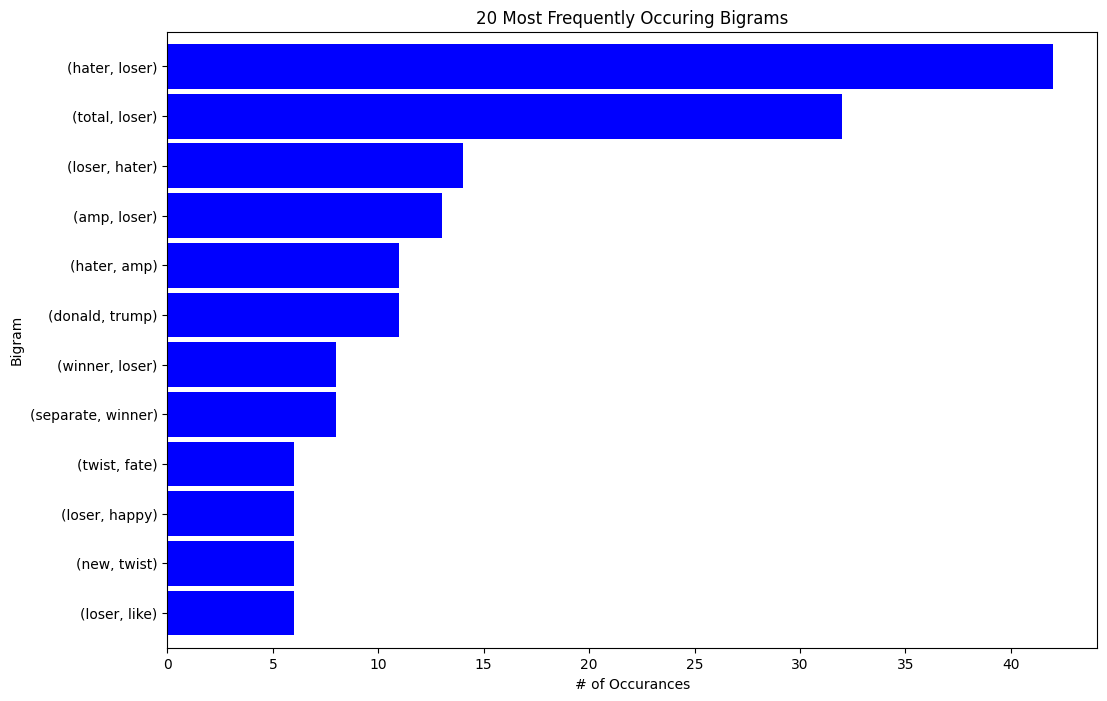

In [47]:
bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('# of Occurances')